### Practical 4

Here, we’ll learn to deploy a collaborative filtering-based movie recommender system using a
k-nearest neighbors algorithm, based on Python and scikit-learn.
We’ll use the k nearest neighbors approach.

The Dataset
The dataset we’ll be working with is a movies dataset: the ml-20m
(http://files.grouplens.org/datasets/movielens/ml-20m)which contains two major .csv files, one
with movies and their corresponding id’s (movies.csv), and another with users, movieIds, and
the corresponding ratings (ratings.csv).

### Steps

1. Load the Data into Pandas Datafram

In [70]:
### Sur le terminal prompt

#pip install fuzzywuzzy

#pip install python-Levenshtein

In [71]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

In [72]:
path = "C://Users//37718890//Downloads/ml-20m/"

In [73]:
path

'C://Users//37718890//Downloads/ml-20m/'

In [74]:
os.chdir(path)

In [75]:
look = os.getcwd()

In [76]:
print('Current working directory ', look)

Current working directory  C:\Users\37718890\Downloads\ml-20m


In [77]:
movies_filename = 'movies.csv'

ratings_filename = 'ratings.csv'

In [78]:
movies_filename

'movies.csv'

In [79]:
ratings_filename

'ratings.csv'

In [80]:
df_movies = pd.read_csv(os.path.join(path, movies_filename),
usecols=['movieId', 'title'], 
dtype={'movieId':'int32', 'title':'str'})

In [81]:
print(os.path.join(path, movies_filename))

C://Users//37718890//Downloads/ml-20m/movies.csv


In [82]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
27273,131254,Kein Bund für's Leben (2007)
27274,131256,"Feuer, Eis & Dosenbier (2002)"
27275,131258,The Pirates (2014)
27276,131260,Rentun Ruusu (2001)


In [83]:
df_ratings = pd.read_csv(os.path.join(path, ratings_filename),
usecols=['userId', 'movieId', 'rating'], 
dtype={'userId':'int32', 'movieId':'int32', 'rating': 'float32'})

In [84]:
path = os.path.join(path, ratings_filename)

In [85]:
path

'C://Users//37718890//Downloads/ml-20m/ratings.csv'

In [86]:
path = "C://Users/37718890/Downloads/ml-20m/"

In [87]:
df_ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [88]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [89]:
df_movies.shape

(27278, 2)

In [90]:
df_ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [91]:
df_ratings.shape

(20000263, 3)

In [92]:
df_ratings = df_ratings[:200000]

In [93]:
df_ratings.shape

(200000, 3)

### Pivot Ratings into Movie-features

To have a better interpretation of the data, we pivot the dataframe

2. Pivot Ratings into Movie-Features : To have a better interpretation of the data, we pivot the
dataframe to have movieId as rows and userId as columns, filling the null values with 0.0.

In [94]:
from scipy.sparse import  csr_matrix

pivot ratings into movie features

In [95]:
df_movie_feature = df_ratings.pivot(
    index = 'movieId',
    columns = 'userId',
    values = 'rating'
).fillna(0)

In [96]:
df_movie_feature

userId,1,2,3,4,5,6,7,8,9,10,...,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,0.0,3.5,0.0,0.0,4.0,5.0,0.0,0.0,4.0
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
df_movie_feature.head()

userId,1,2,3,4,5,6,7,8,9,10,...,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,0.0,3.5,0.0,0.0,4.0,5.0,0.0,0.0,4.0
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0


In [98]:
df_movie_feature.values

array([[0. , 0. , 4. , ..., 0. , 0. , 4. ],
       [3.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 4. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]], dtype=float32)

In [99]:
mat_movie_features = csr_matrix(df_movie_feature.values)

In [100]:
mat_movie_features

<10153x1371 sparse matrix of type '<class 'numpy.float32'>'
	with 200000 stored elements in Compressed Sparse Row format>

In [101]:
print(mat_movie_features)

  (0, 2)	4.0
  (0, 5)	5.0
  (0, 7)	4.0
  (0, 9)	4.0
  (0, 10)	4.5
  (0, 11)	4.0
  (0, 12)	4.0
  (0, 13)	4.5
  (0, 15)	3.0
  (0, 18)	5.0
  (0, 21)	3.0
  (0, 22)	4.0
  (0, 23)	4.0
  (0, 30)	3.0
  (0, 33)	5.0
  (0, 38)	5.0
  (0, 46)	1.0
  (0, 52)	4.0
  (0, 53)	4.0
  (0, 57)	5.0
  (0, 58)	4.5
  (0, 65)	4.0
  (0, 68)	4.0
  (0, 79)	3.0
  (0, 81)	5.0
  :	:
  (10132, 613)	3.0
  (10133, 369)	2.5
  (10133, 630)	3.0
  (10133, 978)	4.5
  (10134, 827)	4.0
  (10134, 1338)	4.0
  (10135, 1343)	4.5
  (10136, 1338)	4.0
  (10137, 968)	2.5
  (10138, 842)	1.0
  (10139, 842)	0.5
  (10140, 842)	1.0
  (10141, 842)	0.5
  (10142, 842)	4.0
  (10143, 767)	3.5
  (10144, 767)	3.5
  (10145, 968)	4.0
  (10146, 30)	0.5
  (10146, 691)	0.5
  (10147, 283)	3.0
  (10148, 691)	0.5
  (10149, 1140)	3.0
  (10150, 963)	4.0
  (10151, 1238)	4.5
  (10152, 1338)	4.5


In [102]:
from sklearn.neighbors import  NearestNeighbors

# just to check

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [103]:
num_users = len(df_ratings.userId.unique())

In [104]:
num_users

1371

In [106]:
num_items = len(df_ratings.movieId.unique())

In [107]:
num_items

10153

In [108]:
print('There are {} unique users and {} unique movies in this data set'.format(num_users , num_items))

There are 1371 unique users and 10153 unique movies in this data set


In [109]:
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(),
columns = ['count'])

df_ratings_cnt_tmp

,count
rating,
0.5,3071
1.0,7483
1.5,2609
2.0,14690
2.5,8274
3.0,43772
3.5,21195
4.0,55450
4.5,15157


. Looking for Threshold Values : By knowing the count of movies, users, and movie ratings, we
can better understand three things:
- A lot of values in the movies*users matrix are zero

In [110]:
total_cnt = num_users * num_items

total_cnt

13919763

In [111]:
df_ratings.shape

(200000, 3)

In [112]:
df_ratings.shape[0]

200000

In [114]:
rating_zero_cnt = total_cnt - df_ratings.shape[0]

In [115]:
rating_zero_cnt

13719763

In [117]:
df_ratings_cnt = pd.concat([df_ratings_cnt_tmp,
pd.DataFrame({'count': rating_zero_cnt}, index=[0.0])]).sort_index()

df_ratings_cnt

,count
0.0,13719763
0.5,3071
1.0,7483
1.5,2609
2.0,14690
2.5,8274
3.0,43772
3.5,21195
4.0,55450
4.5,15157


### log normalise to make it easier to interpret on a graph

In [118]:
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])

df_ratings_cnt

,count,log_count
0.0,13719763,16.434348
0.5,3071,8.029759
1.0,7483,8.920389
1.5,2609,7.866722
2.0,14690,9.594922
2.5,8274,9.020873
3.0,43772,10.686750
3.5,21195,9.961521
4.0,55450,10.923237
4.5,15157,9.626218


In [119]:
plt.style.use('ggplot')

Text(0, 0.5, 'number of ratings')

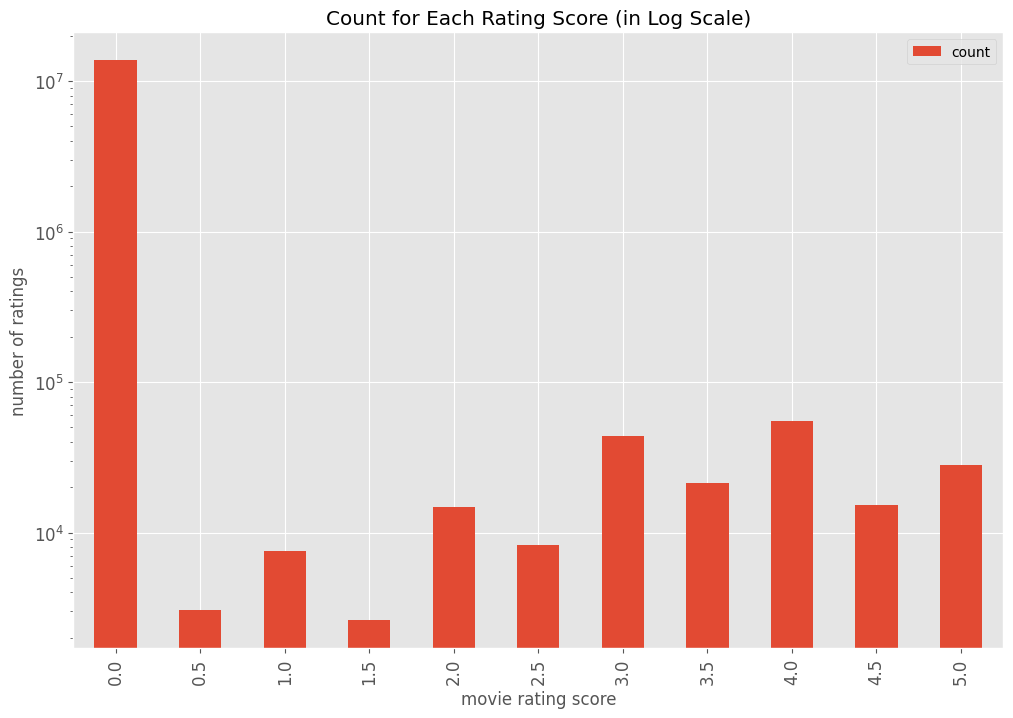

In [121]:
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12, )
    
ax.set_xlabel("movie rating score")
    
ax.set_ylabel("number of ratings")

With logy = false

Text(0, 0.5, 'number of ratings')

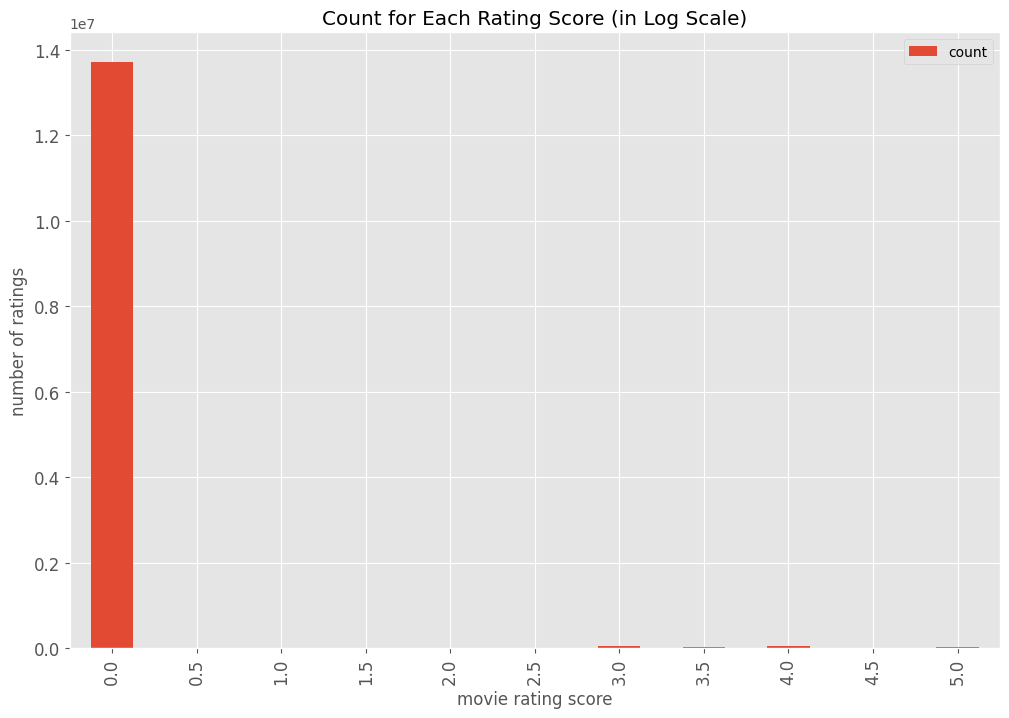

In [122]:
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=False,
    fontsize=12, )
    
ax.set_xlabel("movie rating score")
    
ax.set_ylabel("number of ratings")

get rating frequency

number of ratings each movie got

In [123]:
df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])

df_movies_cnt.head()

,count
movieId,
1,472
2,219
3,125
4,24
5,129


In [124]:
df_movies_cnt

,count
movieId,
1,472
2,219
3,125
4,24
5,129
...,...
128594,1
128686,1
128715,1


To derive predictions regarding movie recommendations, we need movies that have been
rated at least 50 times.


In [126]:
popularity_thres = 50

popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))

df_ratings_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]

print('shape of original ratings data: ', df_ratings.shape)

print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies .shape)

shape of original ratings data:  (200000, 3)
shape of ratings data after dropping unpopular movies:  (128116, 3)


In [127]:
popular_movies

[1,
 2,
 3,
 5,
 6,
 7,
 2054,
 4105,
 10,
 11,
 2058,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 2064,
 24,
 25,
 2076,
 29,
 2078,
 31,
 32,
 2080,
 34,
 2081,
 36,
 2082,
 2085,
 39,
 2087,
 41,
 3264,
 5299,
 44,
 45,
 2094,
 47,
 48,
 2096,
 50,
 52,
 2100,
 4148,
 51255,
 2105,
 58,
 60,
 2108,
 62,
 2109,
 65,
 2115,
 2116,
 70,
 30793,
 6218,
 2124,
 2125,
 2126,
 79,
 2133,
 2134,
 2140,
 95,
 2144,
 2145,
 2150,
 104,
 105,
 107,
 110,
 111,
 112,
 2160,
 2161,
 2167,
 49272,
 69757,
 2174,
 4223,
 4226,
 135,
 2186,
 4235,
 140,
 141,
 4239,
 145,
 2193,
 2194,
 150,
 151,
 4246,
 153,
 158,
 160,
 161,
 162,
 163,
 165,
 4262,
 168,
 8360,
 170,
 8361,
 172,
 173,
 4270,
 7361,
 8368,
 180,
 2231,
 2232,
 185,
 186,
 8376,
 6333,
 193,
 194,
 2243,
 196,
 198,
 2248,
 4299,
 204,
 207,
 208,
 4306,
 4308,
 4310,
 215,
 216,
 2268,
 6365,
 222,
 223,
 224,
 225,
 2273,
 227,
 4321,
 6373,
 230,
 231,
 232,
 2278,
 6377,
 235,
 236,
 237,
 6378,
 33004,
 2288,
 2289,
 2291,
 24

In [128]:
df_ratings_drop_movies

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
199994,1371,1258,5.0
199995,1371,1261,5.0
199996,1371,1274,4.5
199997,1371,1291,5.0


get number of ratings given by every user

In [129]:
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=[ 'count'])

In [130]:
df_users_cnt.head()

,count
userId,
1,116
2,33
3,150
4,26
5,65


In [131]:
df_users_cnt

,count
userId,
1,116
2,33
3,150
4,26
5,65
...,...
1367,153
1368,32
1369,117


filter data to come to an approximation of user likings.

In [133]:
ratings_thres = 50

active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))

df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]

print('shape of original ratings data: ', df_ratings.shape)

print('shape of ratings data after dropping both unpopular movies and inactive users: ' , df_ratings_drop_users.shape)

shape of original ratings data:  (200000, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (109381, 3)


In [134]:
active_users

[1,
 3,
 5,
 7,
 8,
 11,
 13,
 14,
 18,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 31,
 32,
 34,
 35,
 38,
 40,
 42,
 43,
 46,
 48,
 50,
 51,
 53,
 54,
 56,
 58,
 60,
 61,
 67,
 69,
 70,
 72,
 73,
 74,
 77,
 82,
 88,
 89,
 90,
 91,
 93,
 96,
 98,
 101,
 102,
 103,
 104,
 108,
 109,
 110,
 112,
 115,
 116,
 121,
 124,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 141,
 142,
 144,
 147,
 148,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 162,
 163,
 164,
 165,
 168,
 169,
 170,
 175,
 184,
 186,
 188,
 189,
 190,
 195,
 196,
 200,
 202,
 204,
 205,
 206,
 207,
 208,
 211,
 215,
 218,
 220,
 225,
 229,
 232,
 233,
 235,
 237,
 238,
 239,
 240,
 241,
 242,
 245,
 247,
 248,
 249,
 251,
 252,
 254,
 256,
 258,
 259,
 260,
 264,
 265,
 266,
 267,
 269,
 270,
 271,
 272,
 273,
 275,
 278,
 279,
 280,
 283,
 284,
 285,
 286,
 289,
 290,
 292,
 294,
 295,
 298,
 304,
 306,
 309,
 311,
 312,
 313,
 314,
 316,
 317,
 318,
 320,
 330,
 331,
 332,
 333,
 334,
 335,

In [135]:
df_ratings_drop_users.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [137]:
df_ratings_drop_users.head(120)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
173,1,8961,4.0
236,3,1,4.0
237,3,24,3.0
238,3,32,4.0


pivot and create movie-user matrix

In [138]:
movie_user_mat = df_ratings_drop_users.pivot(index='movieId', columns='userId', values= 'rating').fillna(0)

In [139]:
movie_user_mat

userId,1,3,5,7,8,11,13,14,18,21,...,1350,1352,1356,1357,1359,1361,1364,1367,1369,1370
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,0.0,0.0,...,4.0,0.0,0.0,4.0,3.0,0.0,3.5,4.0,0.0,0.0
2,3.5,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
6,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,4.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Example to undersand the next step (map movies titltes to images)

In [140]:
movie_user_mat.index

Index([    1,     2,     3,     5,     6,     7,    10,    11,    14,    16,
       ...
       72998, 73017, 74458, 76093, 78499, 79132, 80463, 81591, 81845, 89745],
      dtype='int32', name='movieId', length=1019)

In [141]:
df_movies.loc[2].title

'Grumpier Old Men (1995)'

Map movie titles to images

In [142]:
movie_to_idx = { movie: i for i, movie in enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title)) }

In [143]:
movie_to_idx

{'Toy Story (1995)': 0,
 'Jumanji (1995)': 1,
 'Grumpier Old Men (1995)': 2,
 'Father of the Bride Part II (1995)': 3,
 'Heat (1995)': 4,
 'Sabrina (1995)': 5,
 'GoldenEye (1995)': 6,
 'American President, The (1995)': 7,
 'Nixon (1995)': 8,
 'Casino (1995)': 9,
 'Sense and Sensibility (1995)': 10,
 'Four Rooms (1995)': 11,
 'Ace Ventura: When Nature Calls (1995)': 12,
 'Money Train (1995)': 13,
 'Get Shorty (1995)': 14,
 'Copycat (1995)': 15,
 'Powder (1995)': 16,
 'Leaving Las Vegas (1995)': 17,
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 18,
 'Dangerous Minds (1995)': 19,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)': 20,
 'Babe (1995)': 21,
 'Dead Man Walking (1995)': 22,
 'Clueless (1995)': 23,
 'Richard III (1995)': 24,
 'Mortal Kombat (1995)': 25,
 'To Die For (1995)': 26,
 'Seven (a.k.a. Se7en) (1995)': 27,
 'Pocahontas (1995)': 28,
 'Usual Suspects, The (1995)': 29,
 'Mighty Aphrodite (1995)': 30,
 'Postman, The (Postino, Il) (1994)': 31,
 'Indian in the

In [144]:
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [145]:
movie_user_mat_sparse

<1019x723 sparse matrix of type '<class 'numpy.float32'>'
	with 109381 stored elements in Compressed Sparse Row format>

In [146]:
print(movie_user_mat_sparse)

  (0, 1)	4.0
  (0, 4)	4.0
  (0, 5)	4.5
  (0, 6)	4.0
  (0, 7)	4.5
  (0, 10)	3.0
  (0, 11)	4.0
  (0, 12)	4.0
  (0, 17)	3.0
  (0, 19)	5.0
  (0, 29)	4.0
  (0, 30)	4.0
  (0, 32)	5.0
  (0, 36)	4.0
  (0, 42)	5.0
  (0, 45)	3.5
  (0, 46)	4.0
  (0, 47)	5.0
  (0, 48)	3.5
  (0, 55)	3.5
  (0, 58)	1.5
  (0, 59)	3.0
  (0, 61)	5.0
  (0, 64)	4.0
  (0, 65)	3.0
  :	:
  (1018, 298)	4.0
  (1018, 307)	5.0
  (1018, 315)	4.0
  (1018, 329)	3.0
  (1018, 336)	4.0
  (1018, 342)	4.0
  (1018, 381)	4.5
  (1018, 385)	4.0
  (1018, 409)	3.0
  (1018, 446)	4.0
  (1018, 447)	4.5
  (1018, 451)	1.5
  (1018, 474)	4.5
  (1018, 487)	3.0
  (1018, 508)	5.0
  (1018, 518)	5.0
  (1018, 526)	4.0
  (1018, 548)	4.5
  (1018, 557)	5.0
  (1018, 565)	4.5
  (1018, 584)	4.0
  (1018, 653)	4.5
  (1018, 669)	3.5
  (1018, 707)	4.5
  (1018, 708)	2.5


4. Apply KNN.

How to define a model (reminder)

In [147]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [148]:
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [149]:
from fuzzywuzzy import  fuzz

In [151]:
def fuzzy_matching(mapper, fav_movie, verbose=True): 
    """
    return the closest match via fuzzy ratio.
    Parameters ----------
    mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie
    verbose: bool, print log if True
    Return
    ------
    index of the closest match
    """
    
    match_tuple = [] # get match
    
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio)) # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
        return match_tuple[0][1] 


def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    """
    return top n similar movie recommendations based on user's input movie
    Parameters
    ----------
    model_knn: sklearn model, knn model
    data: movie-user matrix mapper: dict, map movie title name to index of the movie in data
    fav_movie: str, name of user input movie n_recommendations: int, top n recommendations
    Return
    ------
    list of top n similar movie recommendations
    """
    # fit
    model_knn.fit(data) # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1 )
    raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with similarity of {2}'.format(i+1, reverse_mapper[idx], dist))    

In [153]:
my_favorite = 'Iron Man'
make_recommendation(
model_knn=model_knn,
data=movie_user_mat_sparse,
fav_movie=my_favorite,
mapper=movie_to_idx,
n_recommendations=10)

You have input movie: Iron Man
Found possible matches in our database: ['Iron Man (2008)']

Recommendation system start to make inference
......

Recommendations for Iron Man:
1: Sherlock Holmes (2009), with similarity of 0.3798901438713074
2: Ratatouille (2007), with similarity of 0.3773030638694763
3: Inception (2010), with similarity of 0.3759790062904358
4: Avatar (2009), with similarity of 0.36689335107803345
5: Bourne Ultimatum, The (2007), with similarity of 0.36141252517700195
6: Up (2009), with similarity of 0.3509569764137268
7: WALL·E (2008), with similarity of 0.3493764400482178
8: 300 (2007), with similarity of 0.3398122191429138
9: Dark Knight, The (2008), with similarity of 0.2838273048400879
10: Star Trek (2009), with similarity of 0.2829800248146057


In [154]:
my_favorite = 'Inception'
make_recommendation(
model_knn=model_knn,
data=movie_user_mat_sparse,
fav_movie=my_favorite,
mapper=movie_to_idx,
n_recommendations=10)

You have input movie: Inception
Found possible matches in our database: ['Inception (2010)']

Recommendation system start to make inference
......

Recommendations for Inception:
1: Avengers, The (2012), with similarity of 0.3946443200111389
2: King's Speech, The (2010), with similarity of 0.3901853561401367
3: District 9 (2009), with similarity of 0.38884609937667847
4: Toy Story 3 (2010), with similarity of 0.3855959177017212
5: Shutter Island (2010), with similarity of 0.3773278594017029
6: Iron Man (2008), with similarity of 0.3759790062904358
7: Up (2009), with similarity of 0.36399418115615845
8: Inglourious Basterds (2009), with similarity of 0.34194594621658325
9: Dark Knight, The (2008), with similarity of 0.3007391095161438
10: Avatar (2009), with similarity of 0.2746517062187195
